In [55]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Setting output format

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.width', None) 

In [48]:
# Reading train and test datasets

train_df = pd.read_csv("./data/train_dataset.csv")
test_df = pd.read_csv("./data/test_dataset.csv")

print("Shape of train dataset is: ", train_df.shape)
print("Shape of test dataset is: ", test_df.shape)

train_df.head(20)

Shape of train dataset is:  (38984, 23)
Shape of test dataset is:  (16708, 22)


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,97,239,153,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,88,211,128,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,80,193,120,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,249,210,366,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,100,179,200,47,92,14.9,1,1.2,26,28,15,0,0
5,60,160,50,78.0,1.0,0.9,2,2,126,75,114,177,74,98,64,13.9,1,1.0,47,23,70,0,1
6,40,175,90,95.0,0.9,1.0,1,1,130,88,90,207,331,39,102,16.5,1,1.0,19,22,19,0,0
7,40,180,75,85.0,1.5,1.5,1,1,110,60,100,170,62,58,99,14.0,2,1.4,29,20,32,1,1
8,40,170,60,74.0,1.2,1.5,1,1,89,57,83,178,69,60,104,12.9,2,0.7,17,17,14,0,0
9,45,155,55,78.0,0.7,1.0,1,1,114,81,96,184,177,41,107,13.1,1,0.6,22,15,56,0,0


In [49]:
# Renaming the columns for easier accessibility

new_column_names_train = {
    "age": "age",
    "height(cm)": "height",
    "weight(kg)": "weight",
    "waist(cm)": "waist",
    "eyesight(left)": "eyesight_left",
    "eyesight(right)": "eyesight_right",
    "hearing(left)": "hearing_left",
    "hearing(right)": "hearing_right",
    "systolic": "systolic",
    "relaxation": "relaxation",
    "fasting blood sugar": "fasting_blood_sugar",
    "Cholesterol": "cholesterol",
    "triglyceride": "triglyceride",
    "HDL": "hdl",
    "LDL": "ldl",
    "hemoglobin": "hemoglobin",
    "Urine protein": "urine_protein",
    "serum creatinine": "serum_creatinine",
    "AST": "ast",
    "ALT": "alt",
    "Gtp": "gtp",
    "dental caries": "dental_caries",
    "smoking": "smoker_status"
}

new_column_names_test = {
    "age": "age",
    "height(cm)": "height",
    "weight(kg)": "weight",
    "waist(cm)": "waist",
    "eyesight(left)": "eyesight_left",
    "eyesight(right)": "eyesight_right",
    "hearing(left)": "hearing_left",
    "hearing(right)": "hearing_right",
    "systolic": "systolic",
    "relaxation": "relaxation",
    "fasting blood sugar": "fasting_blood_sugar",
    "Cholesterol": "cholesterol",
    "triglyceride": "triglyceride",
    "HDL": "hdl",
    "LDL": "ldl",
    "hemoglobin": "hemoglobin",
    "Urine protein": "urine_protein",
    "serum creatinine": "serum_creatinine",
    "AST": "ast",
    "ALT": "alt",
    "Gtp": "gtp",
    "dental caries": "dental_caries"
}

train_df.rename(columns = new_column_names_train, inplace = True)
test_df.rename(columns = new_column_names_test, inplace = True)

train_df.head(20)

,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoker_status
0,35,170,85,97.0,0.9,0.9,1,1,118,78,97,239,153,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,88,211,128,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,80,193,120,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,249,210,366,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,100,179,200,47,92,14.9,1,1.2,26,28,15,0,0
5,60,160,50,78.0,1.0,0.9,2,2,126,75,114,177,74,98,64,13.9,1,1.0,47,23,70,0,1
6,40,175,90,95.0,0.9,1.0,1,1,130,88,90,207,331,39,102,16.5,1,1.0,19,22,19,0,0
7,40,180,75,85.0,1.5,1.5,1,1,110,60,100,170,62,58,99,14.0,2,1.4,29,20,32,1,1
8,40,170,60,74.0,1.2,1.5,1,1,89,57,83,178,69,60,104,12.9,2,0.7,17,17,14,0,0
9,45,155,55,78.0,0.7,1.0,1,1,114,81,96,184,177,41,107,13.1,1,0.6,22,15,56,0,0


In [50]:
# Dataset summary

train_df.describe()

,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoker_status
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,99.342269,196.883491,126.749461,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,20.642741,36.353945,71.803143,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,219.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,423.000000,445.000000,999.000000,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [51]:
# Checking for null values

missing_values_train = train_df.isnull().sum()
print("Missing values for each column in train dataset:\n", missing_values_train, "\n\n")

missing_values_test = test_df.isnull().sum()
print("Missing values for each column in test dataset:\n", missing_values_test)


Missing values for each column in train dataset:
 age                    0
height                 0
weight                 0
waist                  0
eyesight_left          0
eyesight_right         0
hearing_left           0
hearing_right          0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
dental_caries          0
smoker_status          0
dtype: int64 


Missing values for each column in test dataset:
 age                    0
height                 0
weight                 0
waist                  0
eyesight_left          0
eyesight_right         0
hearing_left           0
hearing_right          0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceri

As we can see, there are no missing/null values in the entire train and test dataset.

In [54]:
# Unique values

for column in train_df.columns:
    unique_values = train_df[column].unique()
    if len(unique_values) <= 10:
        unique_values_sorted = np.sort(unique_values)
        print(f"{column}: {len(unique_values)} unique values - {unique_values_sorted}")

print("We can see that the columns - hearing_left, hearing_right, urine_protein, dental_caries, smoker_status have less than 10 unique values and has discrete values. This implies that these columns are most likely categorical. We should change them to categorical data types.")

train_df['hearing_left'] = train_df['hearing_left'].astype('category')
train_df['hearing_right'] = train_df['hearing_right'].astype('category')
train_df['urine_protein'] = train_df['urine_protein'].astype('category')
train_df['dental_caries'] = train_df['dental_caries'].astype('category')
train_df['smoker_status'] = train_df['smoker_status'].astype('category')

train_df.dtypes



hearing_left: 2 unique values - [1 2]
hearing_right: 2 unique values - [1 2]
urine_protein: 6 unique values - [1 2 3 4 5 6]
dental_caries: 2 unique values - [0 1]
smoker_status: 2 unique values - [0 1]
We can see that the columns - hearing_left, hearing_right, urine_protein, dental_caries, smoker_status have less than 10 unique values and has discrete values. This implies that these columns are most likely categorical. We should change them to categorical data types.


age                       int64
height                    int64
weight                    int64
waist                   float64
eyesight_left           float64
eyesight_right          float64
hearing_left           category
hearing_right          category
systolic                  int64
relaxation                int64
fasting_blood_sugar       int64
cholesterol               int64
triglyceride              int64
hdl                       int64
ldl                       int64
hemoglobin              float64
urine_protein          category
serum_creatinine        float64
ast                       int64
alt                       int64
gtp                       int64
dental_caries          category
smoker_status          category
dtype: object

Correlation heatmap of continuous variables:


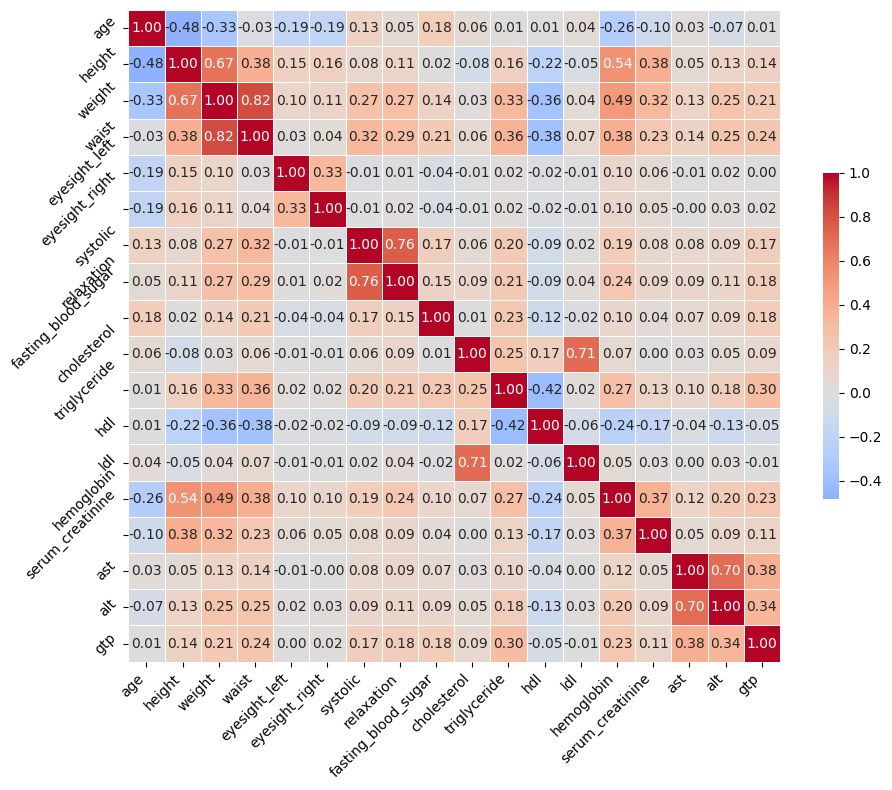

In [57]:
# Correlation analysis

correlation_matrix = train_df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()

print("Correlation heatmap of continuous variables:")
plt.show()


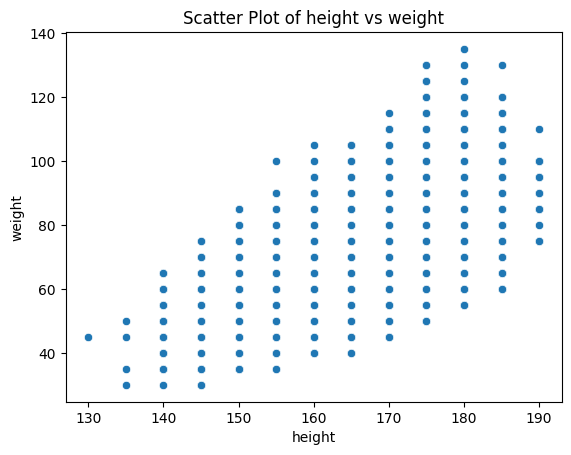

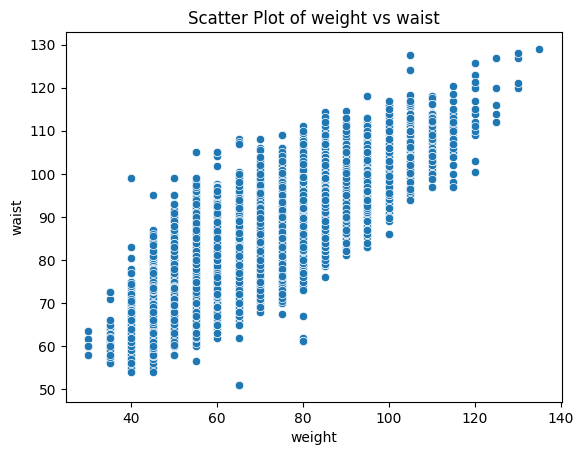

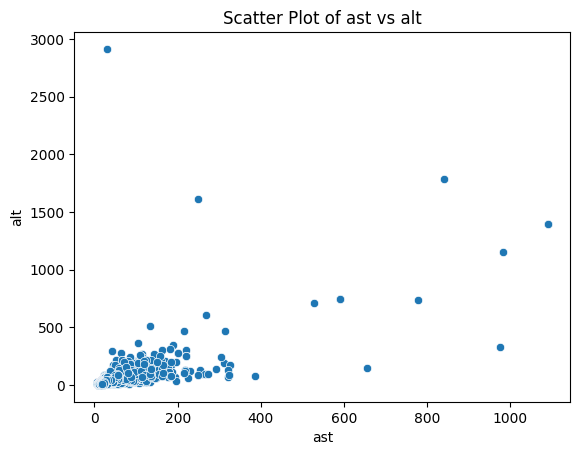

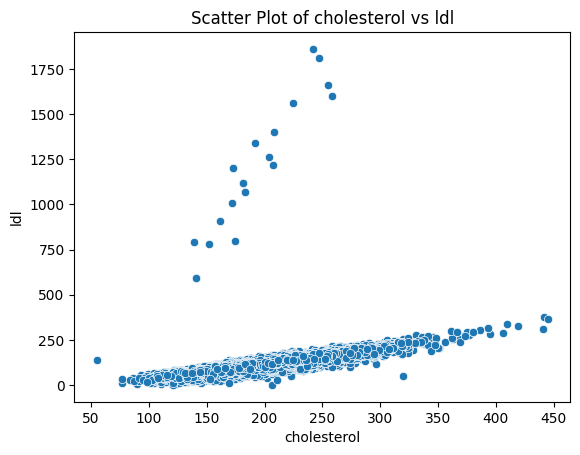

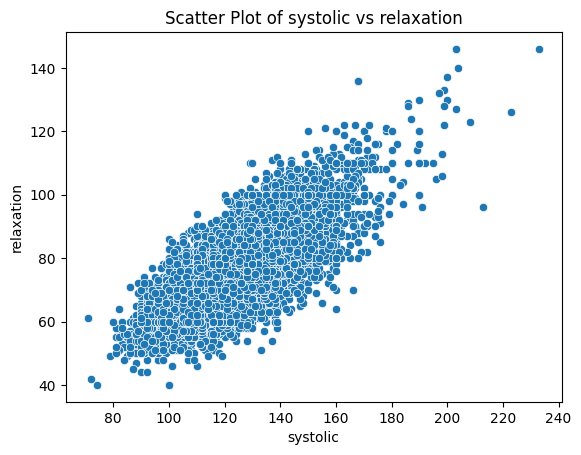

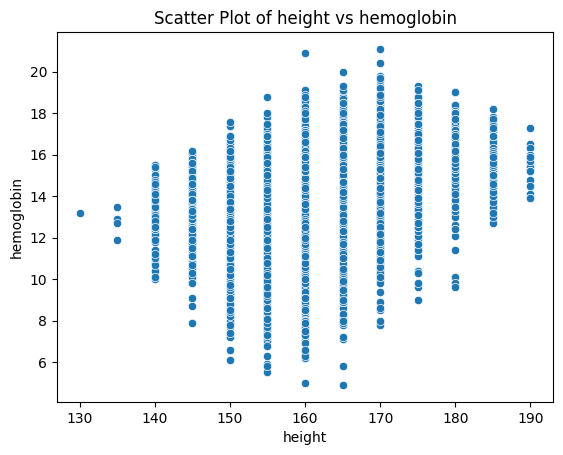

In [61]:
# Scatter plot analysis of columns with high positive (> 0.5) and negative (< -0.5) correlations.

import seaborn as sns
import matplotlib.pyplot as plt

plotted_pairs = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            plotted_pairs.add((col1, col2))

for (col1, col2) in plotted_pairs:
    sns.scatterplot(data=train_df, x=col1, y=col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


Observations:

1. Height vs Weight: This plot typically shows a positive correlation, as taller individuals tend to weigh more. This is expected and follows the pattern of body measurements.

2. Weight vs Waist: Another positive correlation where individuals with more weight have larger waist circumferences. It is consistent with body measurements and could be useful for body composition analysis.

3. AST vs ALT: Both AST (aspartate aminotransferase) and ALT (alanine aminotransferase) are liver enzymes, and their levels are usually correlated in various liver conditions. The positive correlation is expected, and high values for both might indicate liver health issues.

4. Cholesterol vs LDL: LDL (low-density lipoprotein) is a part of total cholesterol, so a positive correlation is logical. The plot might also identify cases of hypercholesterolemia, which could be significant for cardiovascular risk assessment.

5. Systolic vs Relaxation: These are two different blood pressure measurements, systolic (pressure during heartbeats) and diastolic (pressure between beats, also referred to as relaxation in your data). The positive correlation is expected since blood pressure tends to rise and fall in tandem between these two measures.

6. Height vs Hemoglobin: This relationship is less straightforward. While there is a biological plausibility that taller individuals might have slightly more blood volume and possibly more hemoglobin, this is not a well-established correlation and could be influenced by many other factors.

In [74]:
# Feature engineering

train_df['bmi'] = train_df['weight'] / ((train_df['height'] / 100) ** 2)
train_df['waist_to_height_ratio'] = train_df['waist'] / train_df['height']
train_df['bp_index'] = train_df['systolic'] / train_df['relaxation']

test_df['bmi'] = test_df['weight'] / ((test_df['height'] / 100) ** 2)
test_df['waist_to_height_ratio'] = test_df['waist'] / test_df['height']
test_df['bp_index'] = test_df['systolic'] / test_df['relaxation']



In [ ]:
# Scaling columns